## Traffic Sign Recognition(Deep without Spatial Transformer Network)

### Data process

In [1]:
import warnings
warnings.filterwarnings('ignore') 
import pickle
from conv_model import conv_model
import numpy as np

from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam

training_file = './input/train.p'
testing_file = './input/test.p'
validating_file = './input/valid.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validating_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

print("Number of training examples =", X_train.shape[0])
print("Number of validating examples =", X_valid.shape[0])
print("Number of testing examples =", X_test.shape[0])
print("Image data shape =", X_train[0].shape)
print("Number of classes =", len(np.unique(y_train)))

batch_size = 128
epochs = 30
model = conv_model()

adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.01)

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath="./output/stn.h5", verbose=1, save_best_only=True, save_weights_only=True)

model.summary()

Using TensorFlow backend.


Number of training examples = 34799
Number of validating examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_1 (Lambda)            (None, 32, 32, 3)         0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 3)         12        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 10)        40        
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 32, 32, 10)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 10)        40        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 3)

## Training

In [2]:
try:
    history = model.fit(X_train, y_train,
                batch_size=batch_size,
                epochs=epochs,
                validation_data=(X_valid, y_valid),
                shuffle=True,
                callbacks=[checkpointer])
except KeyboardInterrupt:
    print("training interrupted")

Train on 34799 samples, validate on 4410 samples
Epoch 1/30
34799/34799 [==============================] - 64s 2ms/step - loss: 13.8051 - acc: 0.2106 - val_loss: 6.0081 - val_acc: 0.2152

Epoch 00001: val_loss improved from inf to 6.00806, saving model to ./output/stn.h5
Epoch 2/30
34799/34799 [==============================] - 58s 2ms/step - loss: 3.4246 - acc: 0.6198 - val_loss: 4.6032 - val_acc: 0.2401

Epoch 00002: val_loss improved from 6.00806 to 4.60319, saving model to ./output/stn.h5
Epoch 3/30
34799/34799 [==============================] - 58s 2ms/step - loss: 1.8352 - acc: 0.9137 - val_loss: 2.0983 - val_acc: 0.9016

Epoch 00003: val_loss improved from 4.60319 to 2.09827, saving model to ./output/stn.h5
Epoch 4/30
34799/34799 [==============================] - 58s 2ms/step - loss: 1.3301 - acc: 0.9683 - val_loss: 1.3559 - val_acc: 0.9551

Epoch 00004: val_loss improved from 2.09827 to 1.35586, saving model to ./output/stn.h5
Epoch 5/30
34799/34799 [==========================

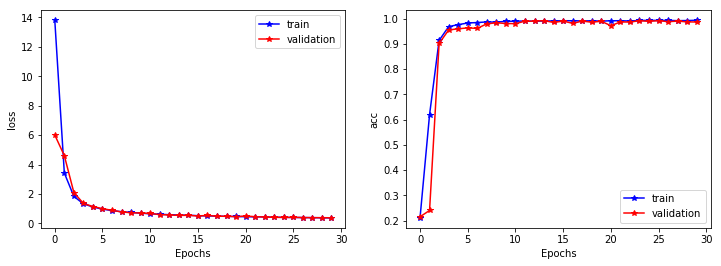

In [5]:
import matplotlib.pyplot as plt

def plot_train_history(history, train_metrics, val_metrics):
    plt.plot(history.history.get(train_metrics),'b-*')
    plt.plot(history.history.get(val_metrics),'r-*')
    plt.ylabel(train_metrics)
    plt.xlabel('Epochs')
    plt.legend(['train', 'validation'])
    
    
plt.figure(figsize=(12,4))
plt.grid()
plt.subplot(1,2,1)
plot_train_history(history, 'loss','val_loss')


plt.subplot(1,2,2)
plot_train_history(history, 'acc','val_acc')


plt.show()

## Evaluation

In [4]:
model.load_weights("./output/stn.h5")
y_pred = model.predict_classes(X_test)
acc = np.sum(y_pred==y_test)/np.size(y_pred)
print("Test accuracy = {}".format(acc))

Test accuracy = 0.9846397466349961
